<a href="https://colab.research.google.com/github/SergioAcuva/SAM_2/blob/main/SAM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segment Anything Model 2 on colab


In [ ]:
# Mount the Gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#/content/drive/MyDrive/SAM 2
# Change the Current working Directory to your Gdrive
%cd /content/drive/MyDrive/SAM_2
!ls -l

/content/drive/MyDrive/SAM_2
total 661
-rw------- 1 root root 676286 Nov 21 16:54 SAM_2.ipynb


Siguiendo la Guía de instalación en https://github.com/facebookresearch/segment-anything-2/tree/main, se realiza lo siguiente:

1. Clona el proyecto de GitHub.
2. Instala el paquete localmente.
3. Descarga los checkpoints de los modelos.
4. Reinicia el entorno de ejecución, y estarás listo para ejecutar el contenido original del notebook.

> REINICIAR el tiempo de ejecución es OBLIGATORIO

In [ ]:
# Clone the github project
!git clone https://github.com/facebookresearch/segment-anything-2.git

Cloning into 'segment-anything-2'...
remote: Enumerating objects: 974, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 974 (delta 17), reused 18 (delta 6), pack-reused 936 (from 1)
Receiving objects: 100% (974/974), 128.94 MiB | 18.08 MiB/s, done.
Resolving deltas: 100% (334/334), done.
Updating files: 100% (566/566), done.


In [ ]:
%cd /content/drive/MyDrive/SAM_2/segment-anything-2
!pwd

/content/drive/MyDrive/SAM_2/segment-anything-2
/content/drive/MyDrive/SAM_2/segment-anything-2


In [ ]:
!pwd
# Install the package
%pip install -e .

/content/drive/MyDrive/SAM_2/segment-anything-2
Obtaining file:///content/drive/MyDrive/SAM_2/segment-anything-2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for SAM-2 (pyproject.toml) ... done
  Created wheel for SAM-2: filename=SAM_2-1.0-0.editable-cp310-cp310-linux_x86_64.whl size=13406 sha256=914d74fe06a1eb3f70463dc47fe93b48bb2386c5c0c960a1acd1bdee67a96687
  Stored in directory: /tmp/pip-ephem-wheel-cache-m5jf_csa/wheels/9e/fe/f9/efb7ffeb388af359e397a81ffe9dc2c60527531acebf65e07f
Successfully built SAM-2
  Attempting uninstall: SAM-2
    Found existing installation: SAM-2 1.0
    Uninstalling SAM-2-1.0:
      Successfully uninstalled SAM-2-1.0


> Es necesario REINICIAR la sesión

In [ ]:
# Change the CWD to checkpoints and donwload the model weights
%cd /content/drive/MyDrive/SAM_2/segment-anything-2/checkpoints/

/content/drive/MyDrive/SAM_2/segment-anything-2/checkpoints


In [ ]:
!bash /content/drive/MyDrive/SAM_2/segment-anything-2/checkpoints/download_ckpts.sh

--2024-11-21 17:01:16--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_tiny.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.96, 3.163.189.108, 3.163.189.14, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156008466 (149M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2.1_hiera_tiny.pt’

sam2.1_hiera_tiny.p 100%[===================>] 148.78M  41.4MB/s    in 3.4s    

2024-11-21 17:01:19 (43.3 MB/s) - ‘sam2.1_hiera_tiny.pt’ saved [156008466/156008466]

--2024-11-21 17:01:20--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.96, 3.163.189.108, 3.163.189.14, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184416285 (176M) [appli

In [ ]:
%cd /content/drive/MyDrive/SAM_2/segment-anything-2/checkpoints/

/content/drive/MyDrive/SAM_2/segment-anything-2/checkpoints


# Máscaras de objetos en imágenes a partir de indicaciones con SAM 2

El modelo Segment Anything 2 (SAM 2) predice máscaras de objetos a partir de indicaciones que indican el objeto deseado. El modelo primero convierte la imagen en una incrustación de imagen que permite producir máscaras de alta calidad de manera eficiente a partir de una indicación.

La clase SAM2ImagePredictor proporciona una interfaz sencilla para el modelo para incitar al modelo. Permite al usuario establecer primero una imagen mediante el método set_image, que calcula las incrustaciones de imagen necesarias. Luego, se pueden proporcionar indicaciones a través del método predict para predecir de manera eficiente las máscaras a partir de esas indicaciones. El modelo puede tomar como entrada indicaciones de punto y de cuadro, así como máscaras de la iteración anterior de predicción.

Si se ejecuta localmente usando jupyter, primero instale `segment-anything-2` en su entorno usando las [instrucciones de instalación](https://github.com/facebookresearch/segment-anything-2#installation) en el repositorio.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor

/content/drive/MyDrive/SAM_2/segment-anything-2/sam2/modeling/sam/transformer.py:23: UserWarning: Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.
  OLD_GPU, USE_FLASH_ATTN, MATH_KERNEL_ON = get_sdpa_settings()


In [ ]:
!nvidia-smi

Thu Nov 21 17:03:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# use bfloat16 for the entire notebook
torch.autocast(device_type="cuda", dtype=torch.bfloat16).__enter__()

if torch.cuda.get_device_properties(0).major >= 8:
    # turn on tfloat32 for Ampere GPUs (https://pytorch.org/docs/stable/notes/cuda.html#tensorfloat-32-tf32-on-ampere-devices)
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True

In [ ]:
def show_mask(mask, ax, random_color=False, borders = True):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask = mask.astype(np.uint8)
    mask_image =  mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    if borders:
        import cv2
        contours, _ = cv2.findContours(mask,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        # Try to smooth contours
        contours = [cv2.approxPolyDP(contour, epsilon=0.01, closed=True) for contour in contours]
        mask_image = cv2.drawContours(mask_image, contours, -1, (1, 1, 1, 0.5), thickness=2)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))

def show_masks(image, masks, scores, point_coords=None, box_coords=None, input_labels=None, borders=True):
    for i, (mask, score) in enumerate(zip(masks, scores)):
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        show_mask(mask, plt.gca(), borders=borders)
        if point_coords is not None:
            assert input_labels is not None
            show_points(point_coords, input_labels, plt.gca())
        if box_coords is not None:
            # boxes
            show_box(box_coords, plt.gca())
        if len(scores) > 1:
            plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
        plt.axis('off')
        plt.show()

# Imagen ejemplo

In [ ]:
image = Image.open("/content/drive/MyDrive/SAM_2/segment-anything-2/notebooks/images/fachada1.jpg")
image = np.array(image.convert("RGB"))

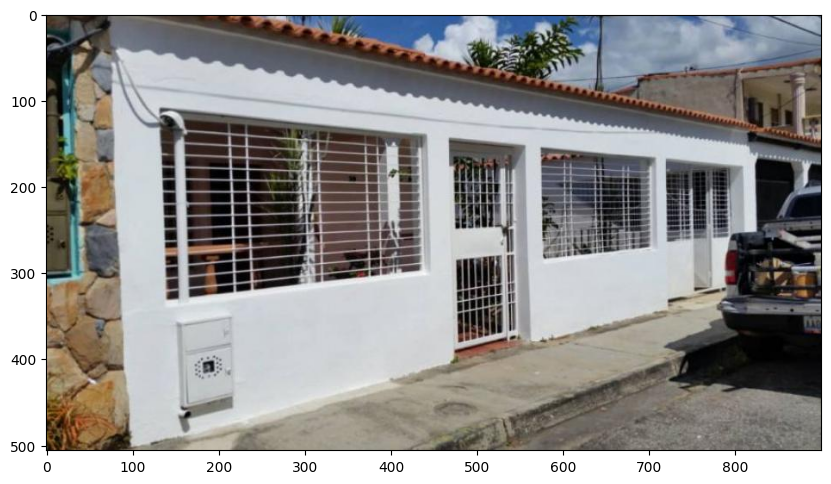

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('on')
plt.show()

# Selección de objetos

In [ ]:
sam2_checkpoint = "/content/drive/MyDrive/SAM_2/segment-anything-2/checkpoints/sam2.1_hiera_large.pt"
model_cfg = "sam2.1/sam2.1_hiera_l.yaml"

sam2_model = build_sam2(model_cfg, sam2_checkpoint, device="cuda")

predictor = SAM2ImagePredictor(sam2_model)

In [ ]:
predictor.set_image(image)

In [ ]:
input_point = np.array([[450, 375]])
input_label = np.array([1])

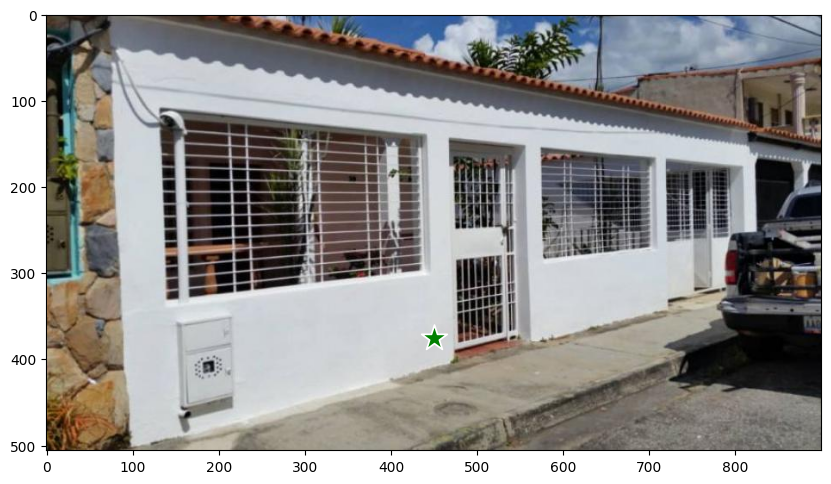

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

In [ ]:
print(predictor._features["image_embed"].shape, predictor._features["image_embed"][-1].shape)

torch.Size([1, 256, 64, 64]) torch.Size([256, 64, 64])


In [ ]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)
sorted_ind = np.argsort(scores)[::-1]
masks = masks[sorted_ind]
scores = scores[sorted_ind]
logits = logits[sorted_ind]

In [ ]:
masks.shape  # (number_of_masks) x H x W

(3, 506, 900)

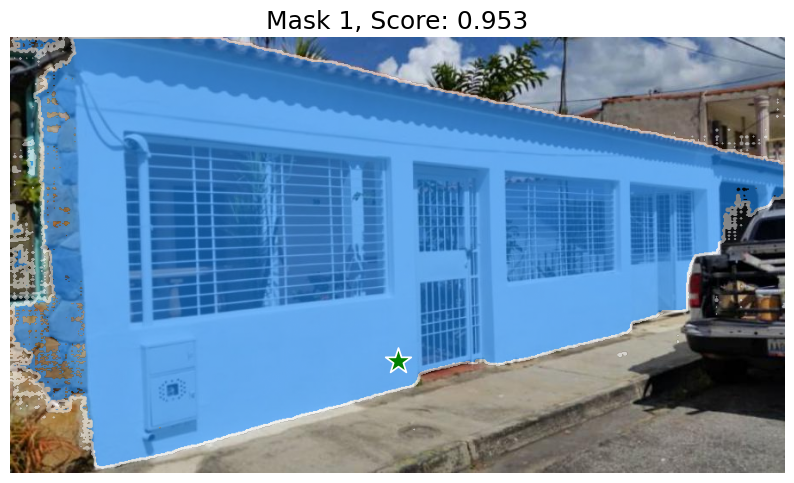

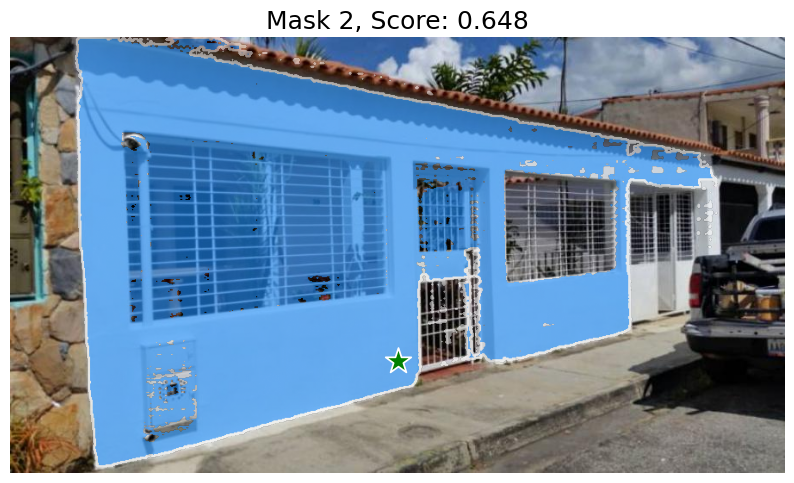

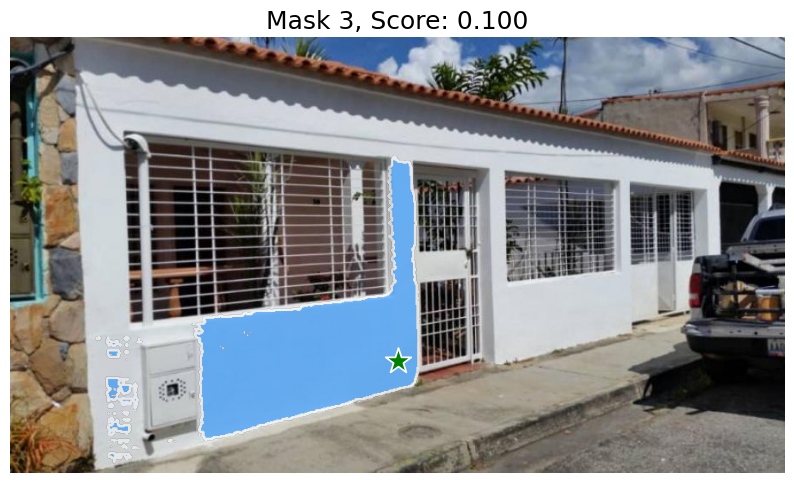

In [ ]:
show_masks(image, masks, scores, point_coords=input_point, input_labels=input_label, borders=True)